# üèÜ Customer Segmentation using K-Means Clustering
## üìä Analyzing E-Commerce Customer Data

### **Project Overview**
This project aims to analyze e-commerce transaction data and segment customers into meaningful groups using **K-Means Clustering**. The goal is to identify different types of customers based on their purchasing behavior, helping businesses to improve marketing strategies.

---

## üöÄ **Tasks To Be Completed**
1Ô∏è‚É£ **Load & Explore the Dataset**  
2Ô∏è‚É£ **Data Cleaning & Preprocessing**  
3Ô∏è‚É£ **Exploratory Data Analysis (EDA)**  
4Ô∏è‚É£ **Feature Selection for Clustering**  
5Ô∏è‚É£ **Apply K-Means Clustering**  
6Ô∏è‚É£ **Visualize the Clusters**  
7Ô∏è‚É£ **Interpret Results & Provide Business Insights**  

---

## üìå **Task Explanations**
### **1Ô∏è‚É£ Load & Explore the Dataset**
- Import necessary Python libraries (e.g., pandas, numpy, matplotlib, seaborn)
- Load the dataset into a Pandas DataFrame
- Display first few rows (`.head()`) to understand data structure

---

### **2Ô∏è‚É£ Data Cleaning & Preprocessing**
- Check for missing values (`.isnull().sum()`)
- Handle missing data (drop or fill missing values)
- Convert date column to **datetime** format
- Remove duplicates (if any)

---

### **3Ô∏è‚É£ Exploratory Data Analysis (EDA)**
- Check statistical summary of the dataset (`.describe()`)
- Analyze distribution of important columns (UnitPrice, Quantity, Country)
- Plot graphs to understand purchasing behavior

---

### **4Ô∏è‚É£ Feature Selection for Clustering**
- Select useful columns for clustering (e.g., `CustomerID`, `Quantity`, `UnitPrice`)
- Create new features if needed (e.g., **Total Spend = Quantity √ó UnitPrice**)
- Normalize data for better clustering results

---

### **5Ô∏è‚É£ Apply K-Means Clustering**
- Decide the optimal number of clusters using **Elbow Method**
- Apply **K-Means Algorithm** on selected features
- Assign each customer to a cluster

---

### **6Ô∏è‚É£ Visualize the Clusters**
- Use scatter plots to visualize customer segments
- Interpret patterns within each cluster
- Compare spending behaviors across clusters

---

### **7Ô∏è‚É£ Interpret Results & Provide Business Insights**
- Identify high-value customers
- Suggest marketing strategies for different clusters
- Provide recommendations for **customer retention & engagement**

---

## üéØ **Final Goal**
By the end of this project, we will have **clear customer segments** based on purchasing patterns. This will help businesses understand their audience better and **improve marketing strategies**.

---

üî• **Let's Get Started!** üöÄ


In [ ]:
# First step :  Load and Explore the dataset
!pip install ucimlrepo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

# Fetch dataset
online_retail = fetch_ucirepo(id=352)

# Access the 'data' component and create DataFrame
# using the 'original' key to get all data
data = pd.DataFrame(online_retail.data.original)


# Display the first few rows of the DataFrame
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [ ]:
data.info()
# data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### üõë Handling Missing Values in CustomerID

The `CustomerID` column has **135,080 missing values** out of **541,909 total records**. Since this column is important for customer segmentation, keeping unknown customers will not help in clustering.  

The best way is to **remove rows with missing CustomerID** to ensure we only analyze known customers.  




In [ ]:
data.dropna(subset='CustomerID',inplace=True)
print(data.shape)
data.isnull().sum()

(406829, 8)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

so as you can see that now we are left with no null values , so now we will explore each column one by one. so first start with invoice number. here is the description of this column:

InvoiceNo	ID	Categorical : 	a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation



In [ ]:
# Count canceled orders
canceled_orders = data[data['InvoiceNo'].astype(str).str.startswith('C')]
total_canceled = len(canceled_orders)

print("Total number of canceled orders:", total_canceled)


Total number of canceled orders: 8905


so we found that total 8905 orders are cancelled orders so these are not beneficial for us so we will  remove them from our data but also keep them as separate dataset so later if we want to explore them than we can explore them easily.

In [ ]:
# Remove canceled orders permanently from the original dataset
data = data[~data['InvoiceNo'].astype(str).str.startswith('C')]

# Reset index after removal (optional, for clean indexing)
data.reset_index(drop=True, inplace=True)


# Step 2: Check which InvoiceNo values are NOT 6-digit numbers
invalid_invoices = data[~data['InvoiceNo'].astype(str).str.match(r'^\d{6}$')]

# Step 3: Count how many such rows exist
total_invalid = len(invalid_invoices)

# Print results
print("Total rows with non-6-digit InvoiceNo:", total_invalid)



Total rows with non-6-digit InvoiceNo: 0


now our invoiceno column is fine and we removed cancelled orders from data and also store them separate. now we will explore "StockCode" column. here is its description:

StockCode	ID	Categorical :	a 5-digit integral number uniquely assigned to each distinct product

In [ ]:
# in this column some values have a letter at start or end so we have to remove it


# Ensure the StockCode column has only 5 digits (remove any letters at the start or end)
data['StockCode'] = data['StockCode'].astype(str).str.extract('(\d{5})')

# Convert the column back to numeric type (optional)
data['StockCode'] = pd.to_numeric(data['StockCode'], errors='coerce').fillna(0).astype(int)
data['StockCode']=data['StockCode'].astype(int)

In [ ]:
# actually some values of stock code are not 0 but very small values like 0.0003 so we have to remove them.
# Remove rows where StockCode is less than 1
data = data[data['StockCode'] >= 1]

# Reset index after removal (optional, for clean indexing)
data.reset_index(drop=True, inplace=True)

now we have explored stock code also and description is also same for each stock code and there is no issue with description also , so now we will check quantity

In [ ]:
# data(395902-395903)
print(data.iloc[395902:395903])


       InvoiceNo  StockCode                  Description  Quantity  \
395902    581483      23843  PAPER CRAFT , LITTLE BIRDIE     80995   

           InvoiceDate  UnitPrice  CustomerID         Country  
395902  12/9/2011 9:15       2.08     16446.0  United Kingdom  


In [ ]:
# # data.describe()
# # after exploring i found only one outlier in quantity so lets remove it
# data=data[data['Quantity'] != 80995]
# data.shape

In [ ]:
data['UnitPrice'].describe()

count    396370.000000
mean          2.867983
std           4.264566
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

In [ ]:
data.shape

(396370, 8)

In [ ]:
# as you can see that some prices are 0 in price collumn so we have to remove them
data=data[data['UnitPrice']>0]


In [ ]:
data['UnitPrice'].describe()

count    396337.000000
mean          2.868222
std           4.264663
min           0.040000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

In [ ]:
data['CustomerID']=data['CustomerID'].astype(int)

now data is cleaned , and now we will do feature engeneering, so first of all as you can see we can make a new column of total price by multiplying quantity with unitprice so lets make it

In [ ]:
data['TotalPrice']=data['Quantity']*data['UnitPrice']

In [ ]:
data['TotalPrice'].describe()

count    396337.000000
mean         22.105094
std         308.899121
min           0.060000
25%           4.680000
50%          11.800000
75%          19.800000
max      168469.600000
Name: TotalPrice, dtype: float64

In [ ]:
# pd.set_option('display.max_rows',10)
data.groupby('CustomerID')['TotalPrice'].sum()

CustomerID
12346    77183.60
12347     4310.00
12348     1437.24
12349     1457.55
12350      294.40
           ...   
18280      180.60
18281       80.82
18282      178.05
18283     2088.93
18287     1837.28
Name: TotalPrice, Length: 4334, dtype: float64

In [ ]:
data.groupby('CustomerID')['InvoiceDate'].count()

CustomerID
12346      1
12347    182
12348     27
12349     72
12350     16
        ... 
18280     10
18281      7
18282     12
18283    754
18287     70
Name: InvoiceDate, Length: 4334, dtype: int64

In [ ]:
aggregated_df= data.groupby('CustomerID',as_index=False).agg(
    MonetaryValue=('TotalPrice','sum'),
    Frequency=('InvoiceNo','nunique'),
    LastInvoiceDate=('InvoiceDate','max')
)
aggregated_df.head()

CustomerID  MonetaryValue  Frequency  LastInvoiceDate
0       12346       77183.60          1  1/18/2011 10:01
1       12347        4310.00          7    8/2/2011 8:48
2       12348        1437.24          4  9/25/2011 13:13
3       12349        1457.55          1  11/21/2011 9:51
4       12350         294.40          1   2/2/2011 16:01

above we have created another dataset from our old dataset and it will really help us to get insights

In [ ]:


# Ensure LastInvoiceDate is in datetime format BEFORE computing max date
aggregated_df['LastInvoiceDate'] = pd.to_datetime(aggregated_df['LastInvoiceDate'])

# Compute max invoice date AFTER conversion
max_invoice_date = aggregated_df['LastInvoiceDate'].max()

# Calculate Recency in days
aggregated_df['Recency'] = (max_invoice_date - aggregated_df['LastInvoiceDate']).dt.days

# Check result
aggregated_df.head()


CustomerID  MonetaryValue  Frequency     LastInvoiceDate  Recency
0       12346       77183.60          1 2011-01-18 10:01:00      325
1       12347        4310.00          7 2011-08-02 08:48:00      129
2       12348        1437.24          4 2011-09-25 13:13:00       74
3       12349        1457.55          1 2011-11-21 09:51:00       18
4       12350         294.40          1 2011-02-02 16:01:00      309

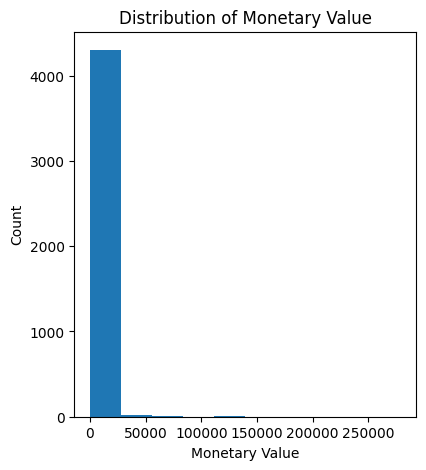

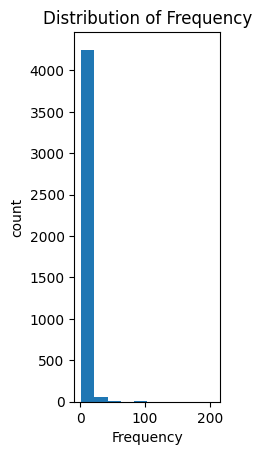

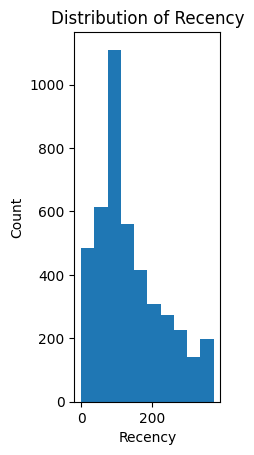

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(aggregated_df['MonetaryValue'])
plt.title('Distribution of Monetary Value')
plt.xlabel('Monetary Value')
plt.ylabel('Count')
plt.show()


plt.subplot(1,3,2)
plt.hist(aggregated_df['Frequency'])
plt.title("Distribution of Frequency")
plt.xlabel('Frequency')
plt.ylabel('count')
plt.show()

plt.subplot(1,3,3)
plt.hist(aggregated_df['Recency'])
plt.title('Distribution of Recency')
plt.xlabel('Recency')
plt.ylabel('Count')
plt.show()


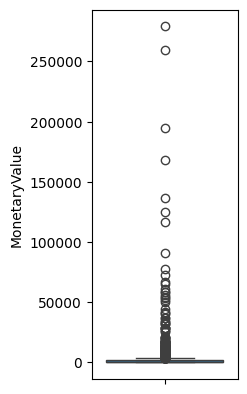

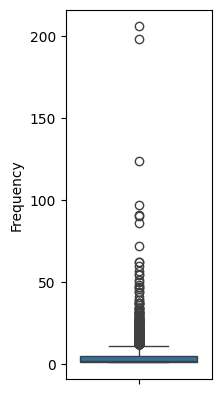

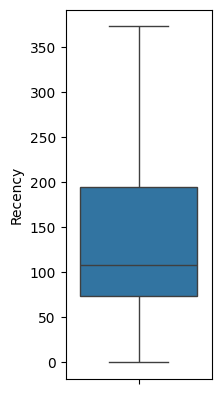

In [ ]:
plt.subplot(1,3,1)
sns.boxplot(data=aggregated_df['MonetaryValue'])
plt.show()

plt.subplot(1,3,2)
sns.boxplot(data=aggregated_df['Frequency'])
plt.show()

plt.subplot(1,3,3)
sns.boxplot(data=aggregated_df['Recency'])
plt.show()

as you can see there are alot of outliers but these outliers are important as well so we will separate them as outlier_df and we will remove them also from aggregated_df

In [ ]:
M_Q1=aggregated_df['MonetaryValue'].quantile(0.25)
M_Q3=aggregated_df['MonetaryValue'].quantile(0.75)
M_IQR=M_Q3-M_Q1

Monetary_Outliers_df=aggregated_df[aggregated_df['MonetaryValue']>(M_Q3 + 1.5 * M_IQR)].copy()
Monetary_Outliers_df.describe()


CustomerID  MonetaryValue   Frequency                LastInvoiceDate  \
count    425.000000     425.000000  425.000000                            425   
mean   15033.644706   12568.004141   16.647059  2011-08-28 05:48:31.905882368   
min    12346.000000    3622.680000    1.000000            2010-12-02 09:44:00   
25%    13324.000000    4359.320000    8.000000            2011-08-23 11:41:00   
50%    15005.000000    5891.610000   12.000000            2011-09-08 14:02:00   
75%    16655.000000    9430.520000   19.000000            2011-09-21 13:01:00   
max    18251.000000  279138.020000  206.000000            2011-12-08 13:47:00   
std     1797.854931   26097.899415   19.066978                            NaN   

          Recency  
count  425.000000  
mean   102.729412  
min      0.000000  
25%     78.000000  
50%     91.000000  
75%    108.000000  
max    372.000000  
std     44.458160

In [ ]:
F_Q1=aggregated_df['Frequency'].quantile(0.25)
F_Q3=aggregated_df['Frequency'].quantile(0.75)
F_IQR= F_Q3-F_Q1

Frequency_Outliers_df=aggregated_df[aggregated_df['Frequency']>(F_Q3 + 1.5 * F_IQR)].copy()

Frequency_Outliers_df.describe()

CustomerID  MonetaryValue   Frequency                LastInvoiceDate  \
count    278.000000     278.000000  278.000000                            278   
mean   15355.669065   14488.006691   23.089928  2011-09-07 01:24:20.503596800   
min    12395.000000    1296.440000   12.000000            2010-12-02 09:44:00   
25%    13880.250000    4197.772500   13.000000            2011-09-04 20:13:00   
50%    15290.500000    6283.525000   17.000000            2011-09-09 10:45:30   
75%    16781.250000   11040.835000   25.000000            2011-09-22 16:55:30   
max    18283.000000  279138.020000  206.000000            2011-09-30 15:04:00   
std     1745.001840   30142.778160   21.166586                            NaN   

          Recency  
count  278.000000  
mean    92.892086  
min     69.000000  
25%     77.000000  
50%     91.000000  
75%     95.000000  
max    372.000000  
std     29.249133

now we separate outliers as dataframe but we will deat them later first lets remove them from aggregated_df and get our non_outliers data frame

In [ ]:
non_outliers_df= aggregated_df[(~aggregated_df.index.isin(Monetary_Outliers_df.index)) & (~aggregated_df.index.isin(Frequency_Outliers_df.index))]

non_outliers_df.describe()

CustomerID  MonetaryValue    Frequency  \
count   3863.000000    3863.000000  3863.000000   
mean   15323.852705     853.814416     2.755113   
min    12348.000000       3.750000     1.000000   
25%    13850.500000     278.500000     1.000000   
50%    15333.000000     570.460000     2.000000   
75%    16798.000000    1187.005000     4.000000   
max    18287.000000    3619.170000    11.000000   
std     1709.731704     794.608100     2.168124   

                     LastInvoiceDate      Recency  
count                           3863  3863.000000  
mean   2011-07-19 03:54:41.812063232   142.758737  
min              2010-12-01 09:53:00     0.000000  
25%              2011-05-17 14:30:00    74.000000  
50%              2011-08-14 12:56:00   116.000000  
75%              2011-09-26 11:44:00   205.000000  
max              2011-12-09 12:16:00   373.000000  
std                              NaN    96.322732

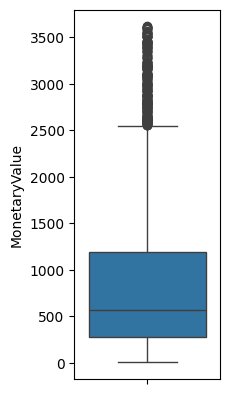

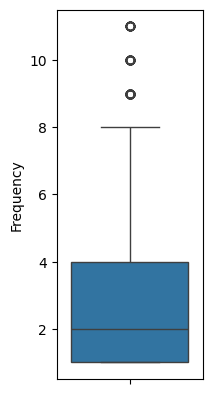

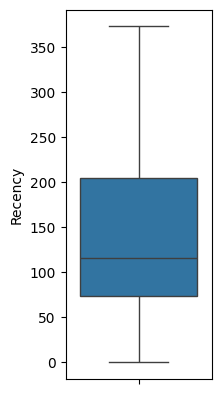

In [ ]:
plt.subplot(1,3,1)
sns.boxplot(data=non_outliers_df['MonetaryValue'])
plt.show()

plt.subplot(1,3,2)
sns.boxplot(data=non_outliers_df['Frequency'])
plt.show()

plt.subplot(1,3,3)
sns.boxplot(data=non_outliers_df['Recency'])
plt.show()

we have still outliers by strict deffinition of outliers but these are tolerable and we will go with it

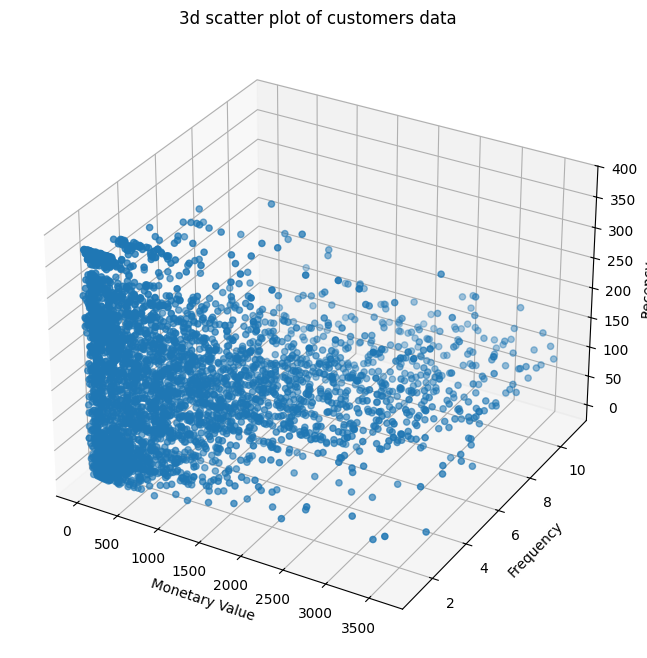

In [ ]:
fig= plt.figure(figsize=(8,8))

ax=fig.add_subplot(projection='3d')

scatter=ax.scatter(non_outliers_df['MonetaryValue'],non_outliers_df['Frequency'],non_outliers_df['Recency'])

ax.set_xlabel("Monetary Value")
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title("3d scatter plot of customers data")

plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

scaled_data=scaler.fit_transform(non_outliers_df[['MonetaryValue','Frequency','Recency']])

scaled_data

array([[ 0.73432565,  0.57425162, -0.71392948],
       [ 0.75988873, -0.8096124 , -1.29538361],
       [-0.70410412, -0.8096124 ,  1.72610122],
       ...,
       [-0.97292551, -0.8096124 ,  0.38668011],
       [-0.85054746, -0.34832439, -0.18439091],
       [ 1.23783397,  0.11296362,  0.60472541]])

In [ ]:
scaled_data=pd.DataFrame(scaled_data,index=non_outliers_df.index,columns=['MonetaryValue','Frequency',"Recency"])

scaled_data.head()

MonetaryValue  Frequency   Recency
2       0.734326   0.574252 -0.713929
3       0.759889  -0.809612 -1.295384
4      -0.704104  -0.809612  1.726101
5       0.669505   1.958116 -0.745079
6      -0.962630  -0.809612  0.625492

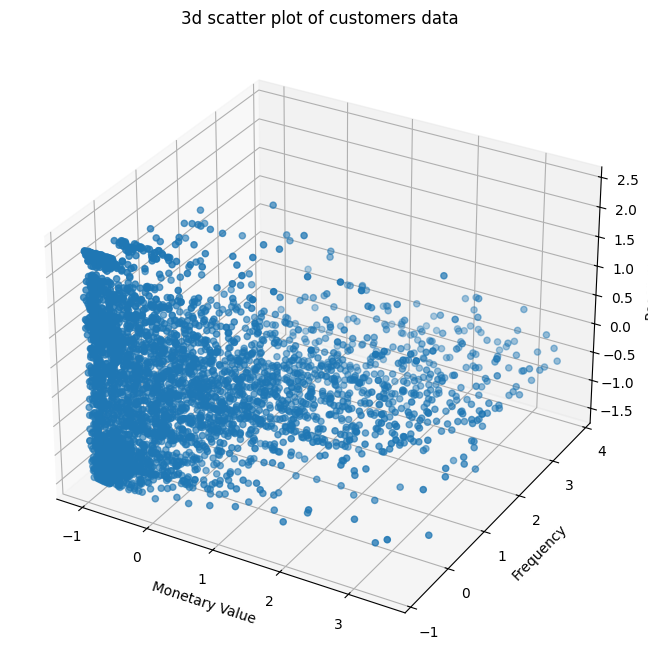

In [ ]:
fig= plt.figure(figsize=(8,12))

ax=fig.add_subplot(projection='3d')

scatter=ax.scatter(scaled_data['MonetaryValue'],scaled_data['Frequency'],scaled_data['Recency'])

ax.set_xlabel("Monetary Value")
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title("3d scatter plot of customers data")

plt.show()

Here‚Äôs a concise set of **notes for the K-Means Clustering algorithm** based on the Gate Smashers video (and general concepts). Save this for revision! üìù

---

### **K-Means Clustering**  
**Type**: Unsupervised Machine Learning (clustering algorithm).  
**Goal**: Partition data into *K* clusters where each data point belongs to the cluster with the nearest mean (centroid).

---

### **Key Steps**:  
1. **Initialize Centroids**:  
   - Randomly select *K* data points as initial centroids (cluster centers).  
   - *K* is predefined (user input).  

2. **Assign Points to Clusters**:  
   - Calculate the distance (e.g., Euclidean) of each data point to all centroids.  
   - Assign each point to the **closest centroid**, forming *K* clusters.  

3. **Update Centroids**:  
   - Recompute the centroid of each cluster by taking the **mean** of all points in that cluster.  

4. **Repeat**:  
   - Reassign points and update centroids iteratively until:  
     - Centroids stabilize (no change).  
     - Maximum iterations reached.  

---

### **Choosing the Value of *K***  
- **Elbow Method**:  
  - Plot the **Within-Cluster Sum of Squares (WCSS)** against different *K* values.  
  - Choose *K* where the WCSS curve forms an "elbow" (sharp bend).  
- **Domain Knowledge**: Use prior understanding of the data.  

---

### **Mathematical Objective**  
Minimize the **sum of squared distances** (WCSS) between points and their cluster centroid:  
\[ \text{WCSS} = \sum_{i=1}^{K} \sum_{x \in C_i} ||x - \mu_i||^2 \]  
Where:  
- \( C_i \) = Cluster *i*  
- \( \mu_i \) = Centroid of cluster *i*  

---

### **Pros & Cons**  
| **Advantages**                      | **Disadvantages**                              |  
|-------------------------------------|------------------------------------------------|  
| Simple and easy to implement.       | Sensitive to initial centroid positions.       |  
| Fast for large datasets.            | Assumes spherical clusters (fails for complex shapes). |  
| Scales well with data.              | Requires predefined *K*.                       |  
| Works well with compact clusters.   | Outliers can skew centroids.                   |  

---

### **Applications**  
- Customer segmentation.  
- Image compression (color reduction).  
- Document clustering (topic modeling).  
- Anomaly detection.  

---

### **Key Terms**  
- **Centroid**: Mean position of all points in a cluster.  
- **WCSS**: Measure of cluster compactness.  
- **Convergence**: When centroids stop changing significantly.  

---

### **Important Notes**  
- **Local Minima**: K-Means can converge to suboptimal solutions. Use multiple initializations (**K-Means++** improves this).  
- **Standardization**: Scale features before clustering (distance-based algorithm).  
- **K-Means vs K-Medoids**: K-Medoids uses actual data points (medoids) as centers, not means (robust to outliers).  

---

**Summary**: K-Means partitions data into *K* clusters by iteratively minimizing the distance between points and centroids. It‚Äôs simple but requires careful choice of *K* and preprocessing.  

Let me know if you need clarifications or more details! üòä

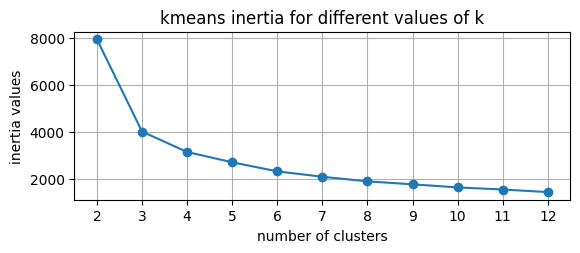

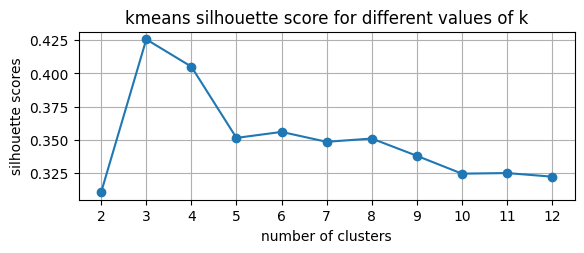

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
max_k=12

inertia=[]
silhouette_scores=[]

k_values=range(2,max_k +1)

for k in k_values:
  kmeans=KMeans(n_clusters=k,random_state=42,max_iter=1000)
  cluster_labels=kmeans.fit_predict(scaled_data)
  sil_score=silhouette_score(scaled_data,cluster_labels)

  silhouette_scores.append(sil_score)


  inertia.append(kmeans.inertia_)

plt.subplot(2,1,1)
plt.plot(k_values,inertia,marker='o')
plt.title('kmeans inertia for different values of k')
plt.xlabel('number of clusters')
plt.ylabel('inertia values')
plt.xticks(k_values)
plt.grid()
plt.show()


plt.subplot(2,1,2)
plt.plot(k_values,silhouette_scores,marker='o')
plt.title('kmeans silhouette score for different values of k')
plt.xlabel('number of clusters')
plt.ylabel('silhouette scores')
plt.xticks(k_values)
plt.grid()
plt.show()


so after plotting as we can see by elbow method and by silhouette score we should use k=4 clusters

In [ ]:
kmeans=KMeans(n_clusters=4,random_state=42,max_iter=1000)
cluster_labels=kmeans.fit_predict(scaled_data)
cluster_labels

array([3, 0, 1, ..., 1, 0, 3], dtype=int32)

In [ ]:
non_outliers_df['cluster']=cluster_labels
non_outliers_df

<ipython-input-107-a97a072805af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df['cluster']=cluster_labels


CustomerID  MonetaryValue  Frequency     LastInvoiceDate  Recency  \
2          12348        1437.24          4 2011-09-25 13:13:00       74   
3          12349        1457.55          1 2011-11-21 09:51:00       18   
4          12350         294.40          1 2011-02-02 16:01:00      309   
5          12352        1385.74          7 2011-09-28 14:58:00       71   
6          12353          89.00          1 2011-05-19 17:47:00      203   
...          ...            ...        ...                 ...      ...   
4328       18278         173.90          1 2011-09-27 11:58:00       73   
4329       18280         180.60          1 2011-03-07 09:52:00      277   
4330       18281          80.82          1 2011-06-12 10:53:00      180   
4331       18282         178.05          2 2011-08-05 13:35:00      125   
4333       18287        1837.28          3 2011-05-22 10:39:00      201   

      cluster  
2           3  
3           0  
4           1  
5           2  
6           1  
...       ...  
4328        0  
4329        1  
4330        1  
4331        0  
4333        3  

[3863 rows x 6 columns]

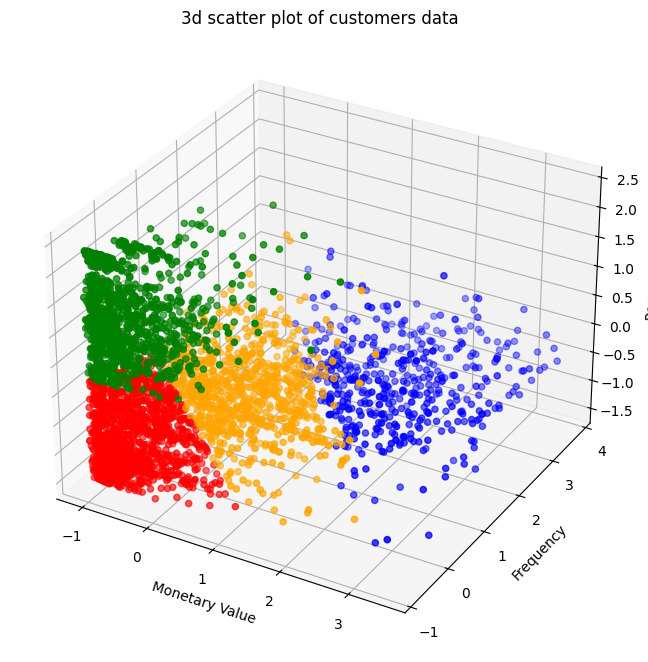

In [ ]:
cluster_colors={0:'red',1:'green',2:'blue',3:'orange'}
colors=non_outliers_df['cluster'].map(cluster_colors)
fig= plt.figure(figsize=(8,12))

ax=fig.add_subplot(projection='3d')

scatter=ax.scatter(scaled_data['MonetaryValue'],scaled_data['Frequency'],scaled_data['Recency'],c=colors,marker='o')

ax.set_xlabel("Monetary Value")
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')


ax.set_title("3d scatter plot of customers data")

plt.show()

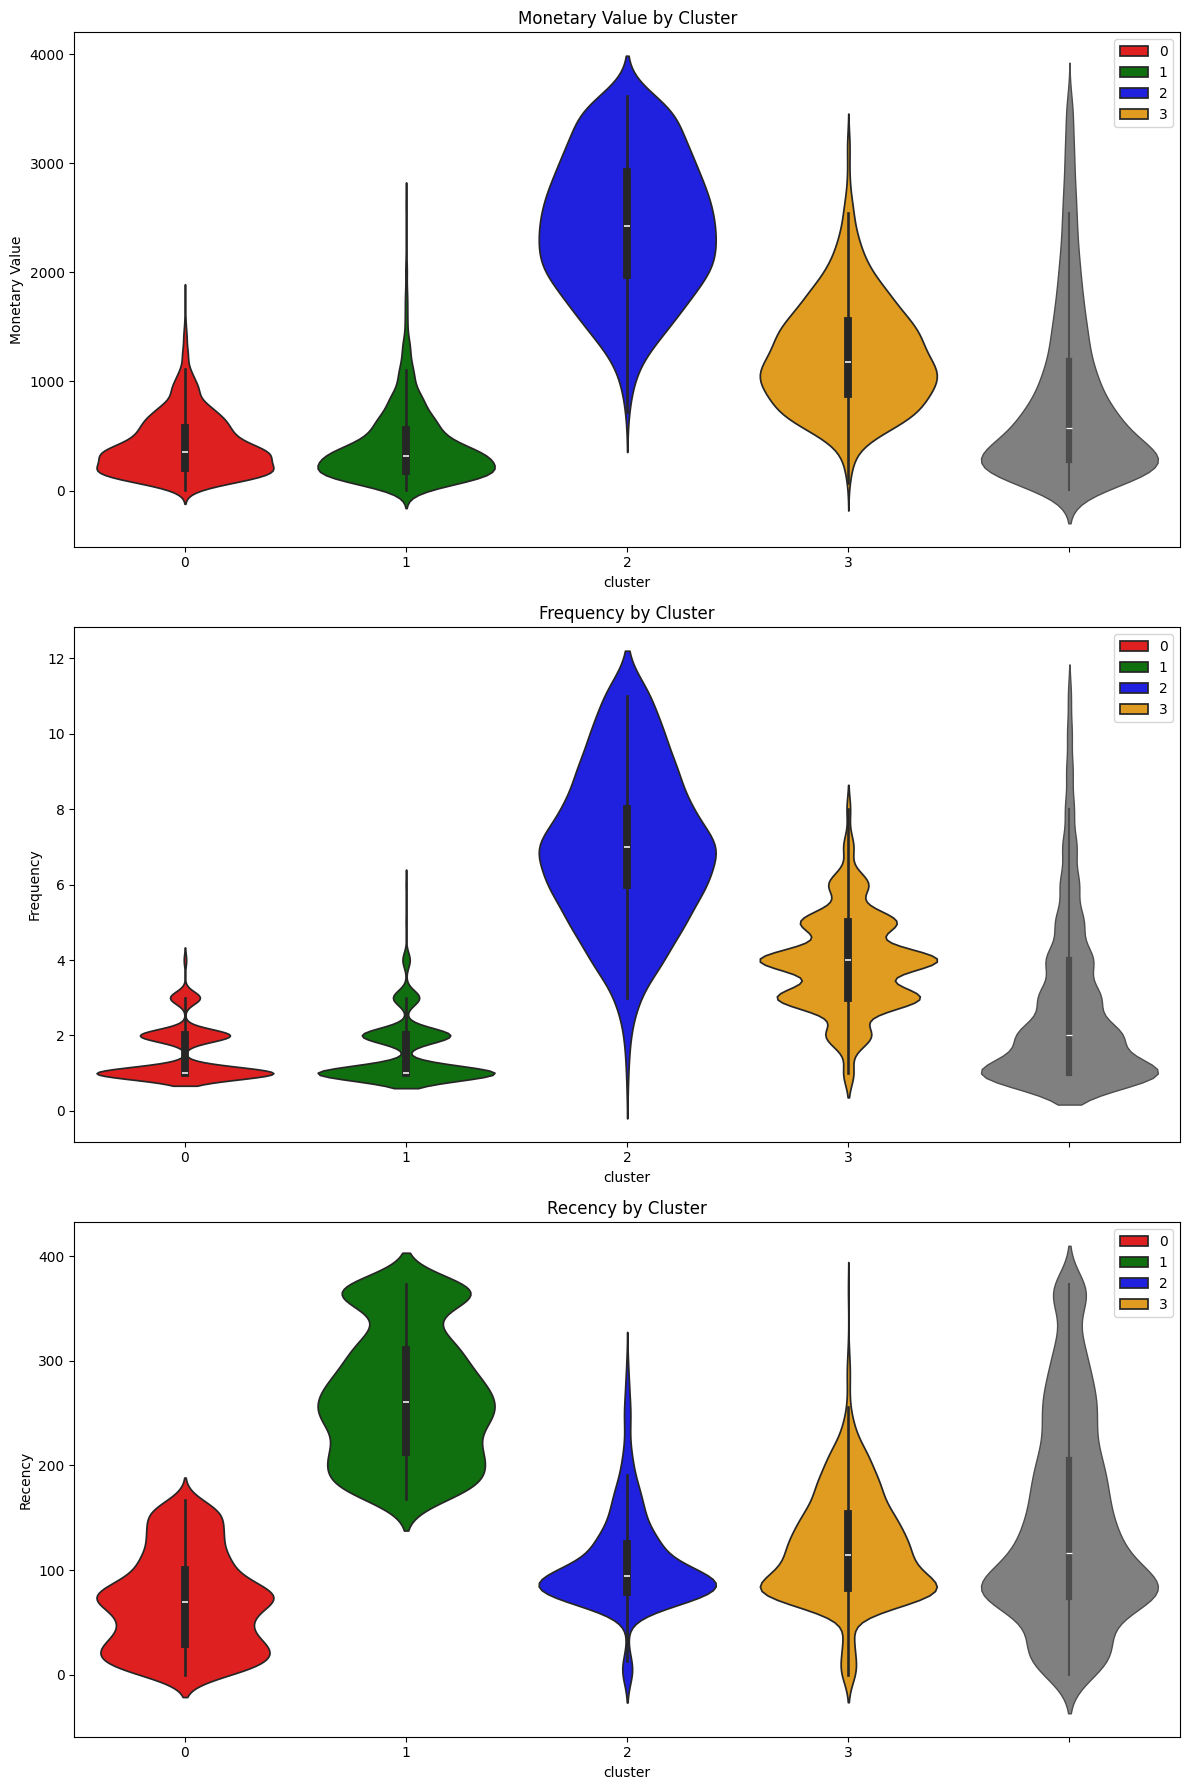

In [ ]:
plt.figure(figsize=(12, 18))

# First subplot
plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['cluster'], y=non_outliers_df['MonetaryValue'], hue=non_outliers_df['cluster'],palette=cluster_colors)
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

# Second subplot
plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['cluster'], y=non_outliers_df['Frequency'], hue=non_outliers_df['cluster'], palette=cluster_colors)
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

# Third subplot
plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['cluster'], y=non_outliers_df['Recency'], hue=non_outliers_df['cluster'], palette=cluster_colors)
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
# plt.savefig('fig.png')
plt.show()

Cluster 0 (Red) spends less money
Cluster 0 has low frequency (buys very few times)
Cluster 0 has low to moderate Recency
so we will give name: Casual Buyers


for cluster 1 Green:
Low Monetary Value ‚Üí ‚úÖ They spend very little money.
Low Frequency ‚Üí ‚úÖ They buy very rarely.
High Recency ‚Üí ‚úÖ They haven‚Äôt bought anything for a long time.
so we will give name of distant shoppers



 Blue Cluster (Cluster 2):

High Monetary Value ‚Üí ‚úÖ They spend a lot of money.
High Frequency ‚Üí ‚úÖ They buy very often.
Moderate Recency ‚Üí ‚úÖ They don‚Äôt buy too frequently, but they are not inactive either.
so we will give name of Loyal Customers


Yellow Cluster (Cluster 3):

Moderate Monetary Value ‚Üí ‚úÖ They spend a decent amount, but not too much.
Moderate Frequency ‚Üí ‚úÖ They buy sometimes, but not very often.
Moderate to High Recency ‚Üí ‚úÖ They haven‚Äôt bought in a while, but they are not completely inactive.
so we will name them Average Shoppers

In [ ]:
overlap_indices=Monetary_Outliers_df.index.intersection(Frequency_Outliers_df.index)
monetary_only_outliers=Monetary_Outliers_df.drop(overlap_indices)
frequency_only_outliers=Frequency_Outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers=Monetary_Outliers_df.loc[overlap_indices]

monetary_only_outliers['cluster']=-1
frequency_only_outliers['cluster']=-2
monetary_and_frequency_outliers['cluster']=-3

In [ ]:
outliers_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])
outliers_df

CustomerID  MonetaryValue  Frequency     LastInvoiceDate  Recency  \
0          12346       77183.60          1 2011-01-18 10:01:00      325   
1          12347        4310.00          7 2011-08-02 08:48:00      129   
10         12357        6207.67          1 2011-11-06 16:07:00       32   
12         12359        6372.58          4 2011-06-03 12:26:00      188   
15         12362        4737.23         10 2011-09-28 12:04:00       72   
...          ...            ...        ...                 ...      ...   
4248       18172        7561.68         20 2011-09-22 16:48:00       77   
4268       18198        5425.56         17 2011-09-29 12:43:00       70   
4287       18223        6484.54         14 2011-09-04 11:49:00       96   
4289       18225        5509.12         12 2011-09-16 15:23:00       83   
4293       18229        7276.90         20 2011-09-07 10:51:00       93   

      cluster  
0          -1  
1          -1  
10         -1  
12         -1  
15         -1  
...       ...  
4248       -3  
4268       -3  
4287       -3  
4289       -3  
4293       -3  

[471 rows x 6 columns]

In [ ]:
full_data=pd.concat([non_outliers_df,outliers_df])
full_data

CustomerID  MonetaryValue  Frequency     LastInvoiceDate  Recency  \
2          12348        1437.24          4 2011-09-25 13:13:00       74   
3          12349        1457.55          1 2011-11-21 09:51:00       18   
4          12350         294.40          1 2011-02-02 16:01:00      309   
5          12352        1385.74          7 2011-09-28 14:58:00       71   
6          12353          89.00          1 2011-05-19 17:47:00      203   
...          ...            ...        ...                 ...      ...   
4248       18172        7561.68         20 2011-09-22 16:48:00       77   
4268       18198        5425.56         17 2011-09-29 12:43:00       70   
4287       18223        6484.54         14 2011-09-04 11:49:00       96   
4289       18225        5509.12         12 2011-09-16 15:23:00       83   
4293       18229        7276.90         20 2011-09-07 10:51:00       93   

      cluster  
2           3  
3           0  
4           1  
5           2  
6           1  
...       ...  
4248       -3  
4268       -3  
4287       -3  
4289       -3  
4293       -3  

[4334 rows x 6 columns]

Cluster -1 (Monetary Outliers) PAMPER:
Characteristics: High spenders but not necessarily frequent buyers. Their purchases are large but infrequent.
Potential Strategy: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

Cluster -2 (Frequency Outliers) UPSELL:
Characteristics: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities.
Potential Strategy: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.

Cluster -3 (Monetary & Frequency Outliers) DELIGHT:
Characteristics: The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention.
Potential Strategy: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.

In [ ]:
names={0:'casual_buyer',1:'distant_buyer',2:'loyal_buyer',3:'average_buyer',-1:"pamper",-2:'upsell',-3:'delight'}
full_data['cluster']=full_data['cluster'].map(names)
full_data

CustomerID  MonetaryValue  Frequency     LastInvoiceDate  Recency  \
2          12348        1437.24          4 2011-09-25 13:13:00       74   
3          12349        1457.55          1 2011-11-21 09:51:00       18   
4          12350         294.40          1 2011-02-02 16:01:00      309   
5          12352        1385.74          7 2011-09-28 14:58:00       71   
6          12353          89.00          1 2011-05-19 17:47:00      203   
...          ...            ...        ...                 ...      ...   
4248       18172        7561.68         20 2011-09-22 16:48:00       77   
4268       18198        5425.56         17 2011-09-29 12:43:00       70   
4287       18223        6484.54         14 2011-09-04 11:49:00       96   
4289       18225        5509.12         12 2011-09-16 15:23:00       83   
4293       18229        7276.90         20 2011-09-07 10:51:00       93   

            cluster  
2     average_buyer  
3      casual_buyer  
4     distant_buyer  
5       loyal_buyer  
6     distant_buyer  
...             ...  
4248        delight  
4268        delight  
4287        delight  
4289        delight  
4293        delight  

[4334 rows x 6 columns]